In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('C:/Users/asus/Downloads/Air-Quality-Index--AQI--main/Air-Quality-Index--AQI--main/city_day.csv')

# Display the first few rows of the dataset
print(data.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  01-01-2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  02-01-2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  03-01-2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  04-01-2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  05-01-2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket Demographics  
0  133.36     0.00     0.02    0.00  NaN        NaN   industrial  
1   34.06     3.68     5.50    3.77  NaN        NaN  residential  
2   30.70     6.80    16.40    2.25  NaN        NaN  residential  
3   36.08     4.43    10.14    1.00  NaN        NaN  residential  
4   39.31     7.01    18.89    2.78  NaN        NaN  residential  


In [2]:
# Inspect the structure and data types of the dataset
print(data.info())

# Check for any missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          29531 non-null  object 
 1   Date          29531 non-null  object 
 2   PM2.5         24933 non-null  float64
 3   PM10          18391 non-null  float64
 4   NO            25949 non-null  float64
 5   NO2           25946 non-null  float64
 6   NOx           25346 non-null  float64
 7   NH3           19203 non-null  float64
 8   CO            27472 non-null  float64
 9   SO2           25677 non-null  float64
 10  O3            25509 non-null  float64
 11  Benzene       23908 non-null  float64
 12  Toluene       21490 non-null  float64
 13  Xylene        11422 non-null  float64
 14  AQI           24850 non-null  float64
 15  AQI_Bucket    24850 non-null  object 
 16  Demographics  29531 non-null  object 
dtypes: float64(13), object(4)
memory usage: 3.8+ MB
None
City            

In [3]:
# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Verify that there are no remaining missing values
print(data.isnull().sum())


City               0
Date               0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI                0
AQI_Bucket      4681
Demographics       0
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_1352\57249324.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [4]:
# Identify categorical columns (e.g., 'city' if it has city names)
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# One-hot encode the categorical columns
data = pd.get_dummies(data, columns=categorical_columns)
print(data.head())


Categorical Columns: Index(['City', 'Date', 'AQI_Bucket', 'Demographics'], dtype='object')
       PM2.5        PM10     NO    NO2    NOx        NH3     CO    SO2  \
0  67.450578  118.127103   0.92  18.22  17.15  23.483476   0.92  27.64   
1  67.450578  118.127103   0.97  15.69  16.46  23.483476   0.97  24.55   
2  67.450578  118.127103  17.40  19.30  29.70  23.483476  17.40  29.07   
3  67.450578  118.127103   1.70  18.48  17.97  23.483476   1.70  18.59   
4  67.450578  118.127103  22.10  21.42  37.76  23.483476  22.10  39.33   

       O3  Benzene  ...  Date_31-12-2018  Date_31-12-2019  AQI_Bucket_Good  \
0  133.36     0.00  ...                0                0                0   
1   34.06     3.68  ...                0                0                0   
2   30.70     6.80  ...                0                0                0   
3   36.08     4.43  ...                0                0                0   
4   39.31     7.01  ...                0                0                0

In [5]:
# Assuming 'PM2.5' is the target variable for predicting PM2.5 levels
# Remove 'PM2.5' column from features and assign it as the target variable
features = data.drop(['PM2.5'], axis=1)  # Drop the target column from features
target = data['PM2.5']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and apply the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout layer for regularization

# Hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               263168    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [8]:
# Compile the model with mean squared error as the loss function and mean absolute error as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [9]:
# Train the model on the training data with a validation split of 20%
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/10
296/296 [==============================] - 3s 6ms/step - loss: 2953.0725 - mae: 32.4134 - val_loss: 1384.3109 - val_mae: 20.3787
Epoch 2/10
296/296 [==============================] - 2s 5ms/step - loss: 1435.9795 - mae: 21.7433 - val_loss: 1235.8541 - val_mae: 19.5794
Epoch 3/10
296/296 [==============================] - 2s 5ms/step - loss: 1238.0919 - mae: 20.4358 - val_loss: 1253.0164 - val_mae: 20.0222
Epoch 4/10
296/296 [==============================] - 2s 5ms/step - loss: 1209.0891 - mae: 20.3537 - val_loss: 1195.4888 - val_mae: 19.3762
Epoch 5/10
296/296 [==============================] - 2s 6ms/step - loss: 1094.6227 - mae: 19.4255 - val_loss: 1181.9128 - val_mae: 18.9268
Epoch 6/10
296/296 [==============================] - 2s 6ms/step - loss: 1061.4043 - mae: 18.7571 - val_loss: 1178.0066 - val_mae: 18.7843
Epoch 7/10
296/296 [==============================] - 2s 6ms/step - loss: 1015.8711 - mae: 18.5073 - val_loss: 1200.9421 - val_mae: 18.9967
Epoch 8/10
296/296 [

In [10]:
# Evaluate the model on both training and testing sets
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss (MSE): {train_loss}, Training MAE: {train_mae}")
print(f"Testing Loss (MSE): {test_loss}, Testing MAE: {test_mae}")


Training Loss (MSE): 785.650634765625, Training MAE: 14.78397274017334
Testing Loss (MSE): 887.4387817382812, Testing MAE: 18.378917694091797


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


185/185 [==============================] - 0s 1ms/step
Mean Squared Error: 887.4390894890403
Mean Absolute Error: 18.37892065738724


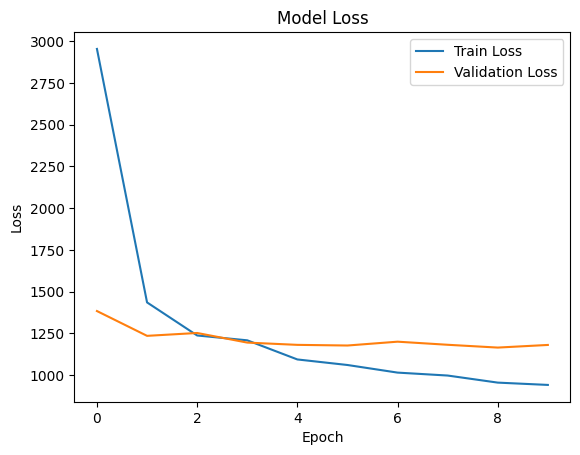

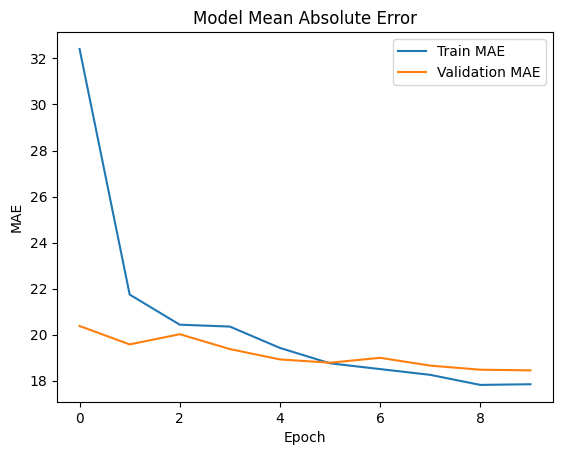

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [60]:
# Example sample data (replace with actual values for prediction)
sample_data = {
    'City_Name': 'Ahmedabad',  # or any other city name
    'Date': '2015-07-11',         # or any other relevant date
    'AQI': 247,                   # example value, replace with actual
    # Add other relevant columns and values as per your dataset
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_data])


In [61]:
# Ensure the sample data has the same columns as the training data
# Add any missing columns with a value of 0
for col in features.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Reorder columns to match the structure of training data
sample_df = sample_df[features.columns]


C:\Users\asus\AppData\Local\Temp\ipykernel_1352\711404195.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
C:\Users\asus\AppData\Local\Temp\ipykernel_1352\711404195.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
C:\Users\asus\AppData\Local\Temp\ipykernel_1352\711404195.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [62]:
# Scale the sample data using the scaler fit on the training data
sample_scaled = scaler.transform(sample_df)


In [63]:
# Use the model to predict PM2.5 based on the sample data
predicted_pm25 = model.predict(sample_scaled)[0][0]

# Print whether the area is residential or industrial based on PM2.5 level
if predicted_pm25 <= 50:
    print("Predicted PM2.5 Level:", predicted_pm25, "- Residential Area")
elif 50 < predicted_pm25 <= 100:
    print("Predicted PM2.5 Level:", predicted_pm25, "- Residential Area (Moderate)")
elif 100 < predicted_pm25 <= 250:
    print("Predicted PM2.5 Level:", predicted_pm25, "- Industrial Area (Unhealthy)")
else:
    print("Predicted PM2.5 Level:", predicted_pm25, "- Industrial Area (Hazardous)")


1/1 [==============================] - 0s 22ms/step
Predicted PM2.5 Level: 58.17759 - Residential Area (Moderate)


In [17]:
# Predict PM2.5 levels on the test set
y_pred = model.predict(X_test)


185/185 [==============================] - 0s 1ms/step


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 18.37892065738724
Mean Squared Error (MSE): 887.4390894890403
Root Mean Squared Error (RMSE): 29.789915902684925
R-squared (R²): 0.7299423544216304
